# load libraries and features into dataframe

In [1]:
# import libs
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import own modules
sys.path.append("..")  # Adds higher directory to python modules path.
from scripts import features as ft
from scripts import evaluate_models as em

# load feautures - from csv file
path_df = os.path.join("..", "data", "df_deep_sam.csv")
df = pd.read_csv(path_df)

# histograms

Just by eyeballing at the EDA results we see three features which obviously show trends in different eye gaze behaviour between both groups. A threshold value was approximated for each of these features and used as a decision criterion to build abaseline model.

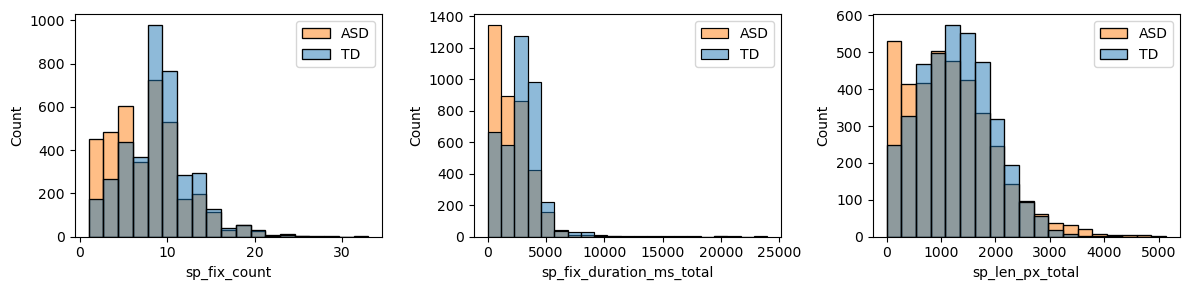

In [2]:
# plot very basic histograms
plt.figure(figsize=(12, 3))
for i, c in enumerate(["sp_fix_count", "sp_fix_duration_ms_total", "sp_len_px_total"]):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=c, hue="asd", bins="doane")
    plt.legend(["ASD", "TD"])

plt.tight_layout()

# Baseline model

If all of the following three criteria are met, we classify a scanpath as ASD:
- `fixation count` < 7
- `total fixation duration` < 2500 ms
- `total scanpath length` < 600 px

In [3]:
baseline_idx = df[
    (df["sp_fix_count"] < 7)
    & (df["sp_fix_duration_ms_total"] < 2500)
    & (df["sp_len_px_total"] < 600)
].index

# create prediction pd.series
baseline_pred = pd.Series(np.zeros((df.shape[0],)), index=df.index)
baseline_pred[baseline_idx] = 1.0


# Results

-------------------- classification report for 'Test' --------------------
              precision    recall  f1-score   support

           0      0.547     0.898     0.679      3837
           1      0.697     0.241     0.358      3761

    accuracy                          0.572      7598
   macro avg      0.622     0.569     0.519      7598
weighted avg      0.621     0.572     0.520      7598

f(0.5)-score: 0.505
f(2.0)-score: 0.277



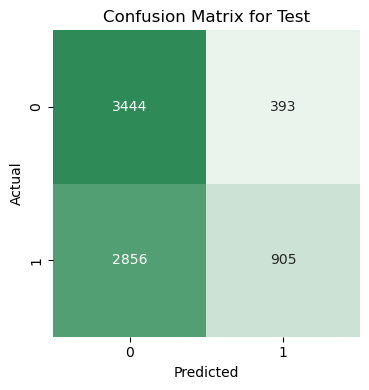

In [4]:
em.report(y_test=df["asd"], y_test_pred=baseline_pred)

## Conclusion

Our baseline model achieves an accuracy of 57.2%, which is not bad.

But more importantly, _recall_ and _f2_ scores are very low, 24.1%, respectively 27.7% !

That means, that a lot of ASD children are not detected as such, which is the opposite effect for a diagnostic tool as we are developing.